In [1]:
import os
import matplotlib.pyplot as plt

from utils import add_path, save_in

add_path()
from model import (
    SocietyConstantsEnergyPrices,
    GovernmentBuildChargingStation,
    GovernmentMixedStrategy,
    GovernmentProvidesSubsidies,
    CV,
    EV,
    PHEV,
)
from model.utils import get_trajectories, common_params, plot_intervals

In [2]:
plt.style.use("grayscale")

# plt.style.use("dark_background")
# plt.rc("grid", alpha=0.3)

In [24]:
N = common_params["kwargs"]["population"]
common_params["kwargs"]["government"] = GovernmentProvidesSubsidies(
    one_subsidity_level=80_000, PHEV_sub_scaler=0.1
)

In [25]:
name = "longHorizontSubs"
common_params["kwargs"]

{'alpha': 0.01,
 'car_price_noise': <function model.utils.common_params.<lambda>()>,
 'city_size': (17, 17),
 'corporation_margin': 0.2,
 'corporation_technological_progress': 0.004,
 'energy_price': 500,
 'energy_factor': 0.8,
 'fuel_price': 6,
 'government': <model.Government.GovernmentProvidesSubsidies at 0x7f9306b98610>,
 'initial_public_chargers': 1,
 'initial_time': (2015, 1),
 'nerby_radius': 1,
 'population': 3000}

In [26]:
# [CVs, EVs, PHEVs, year] = get_trajectories(
#     SocietyConstantsEnergyPrices, common_params["kwargs"], T, MC, 4
# )
[CVs, EVs, PHEVs, year] = get_trajectories(
    SocietyConstantsEnergyPrices,
    common_params["kwargs"],
    T,
    MC,
    1,
)

Text(0.5, 1.0, 'PHEV')

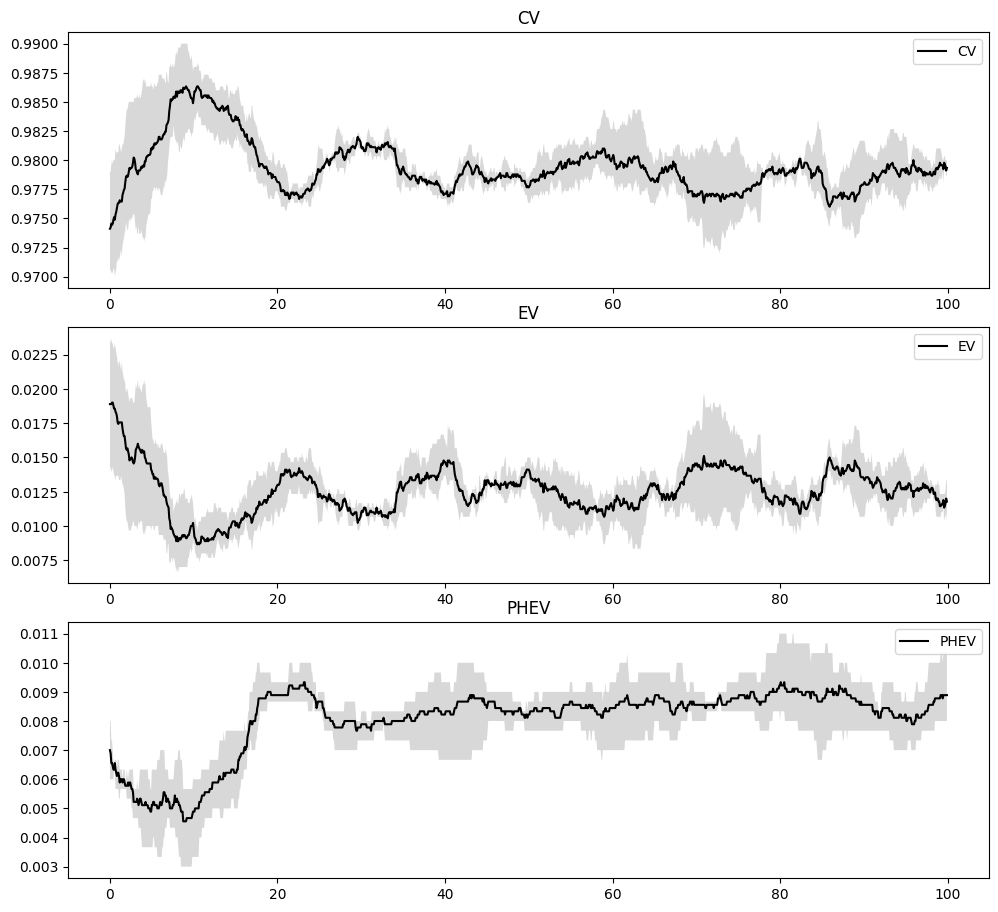

In [27]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 9))
# fig.suptitle("constatnt prices, government build chargers stations", fontsize=16)

plot_intervals(
    year / 12,
    [trajectory / N for trajectory in CVs],
    ax=axs[0],
    # color="c",
    label="CV",
    alpha=0.3,
)
plot_intervals(
    year / 12,
    [trajectory / N for trajectory in EVs],
    ax=axs[1],
    # color="m",
    label="EV",
    alpha=0.3,
)
plot_intervals(
    year / 12,
    [trajectory / N for trajectory in PHEVs],
    ax=axs[2],
    # color="y",
    label="PHEV",
    alpha=0.3,
)

fig.set_facecolor("white")
fig.tight_layout()

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].set_title("CV")
axs[1].set_title("EV")
axs[2].set_title("PHEV")

# save_in(name)

Text(0.5, 0.98, 'Distributoins of increase cars during model')

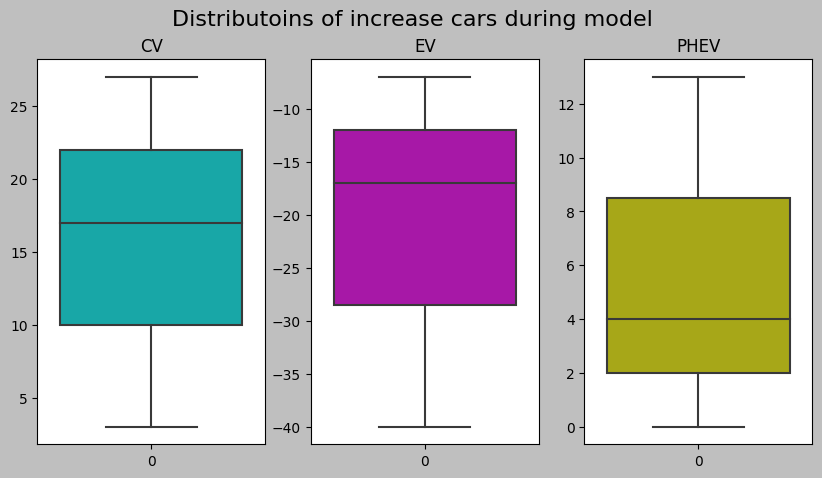

In [28]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))
import seaborn as sns

sns.boxplot(
    [line.loc[len(line) - 1] - line.loc[0] for line in CVs], ax=axs[0], color="c"
)
axs[0].set_title("CV")

sns.boxplot(
    [line.loc[len(line) - 1] - line.loc[0] for line in EVs], ax=axs[1], color="m"
)
axs[1].set_title("EV")

sns.boxplot(
    [line.loc[len(line) - 1] - line.loc[0] for line in PHEVs], ax=axs[2], color="y"
)
axs[2].set_title("PHEV")

fig.suptitle("Distributoins of increase cars during model", fontsize=16)